<a href="https://colab.research.google.com/github/midounai/dry_bean_classfication/blob/main/dry_bean_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2023-02-01 15:08:53--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2023-02-01 15:08:53--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf.1’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2023-02-01 15:08:5

In [ ]:

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

from matplotlib.font_manager import FontProperties
import seaborn as sns
myfont=FontProperties(fname=r'./TaipeiSansTCBeta-Regular.ttf',size=14)
sns.set(font=myfont.get_family())

In [ ]:
from google.colab import files
# 上傳CSV
uploaded = files.upload()

Saving Dry_Bean_Dataset.xlsx to Dry_Bean_Dataset.xlsx


In [ ]:
import io
df = pd.read_excel('Dry_Bean_Dataset.xlsx')  

In [ ]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
# #將欄位名稱翻成中文
# df.columns=['面積','周長','長軸長度','短軸長度','縱橫比','偏心率','凸面積',
#             '等效球直徑','Extent','穩固性','圓度','緊湊度','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','種類']

In [ ]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df.groupby(df['Class']).size()

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64

In [ ]:
label_map = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}

df['Class'] = df['Class'].map(label_map)

In [ ]:
df.groupby(df['Class']).size()

Class
0    1322
1     522
2    1630
3    3546
4    1928
5    2027
6    2636
dtype: int64

In [ ]:
df['Class']

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int64

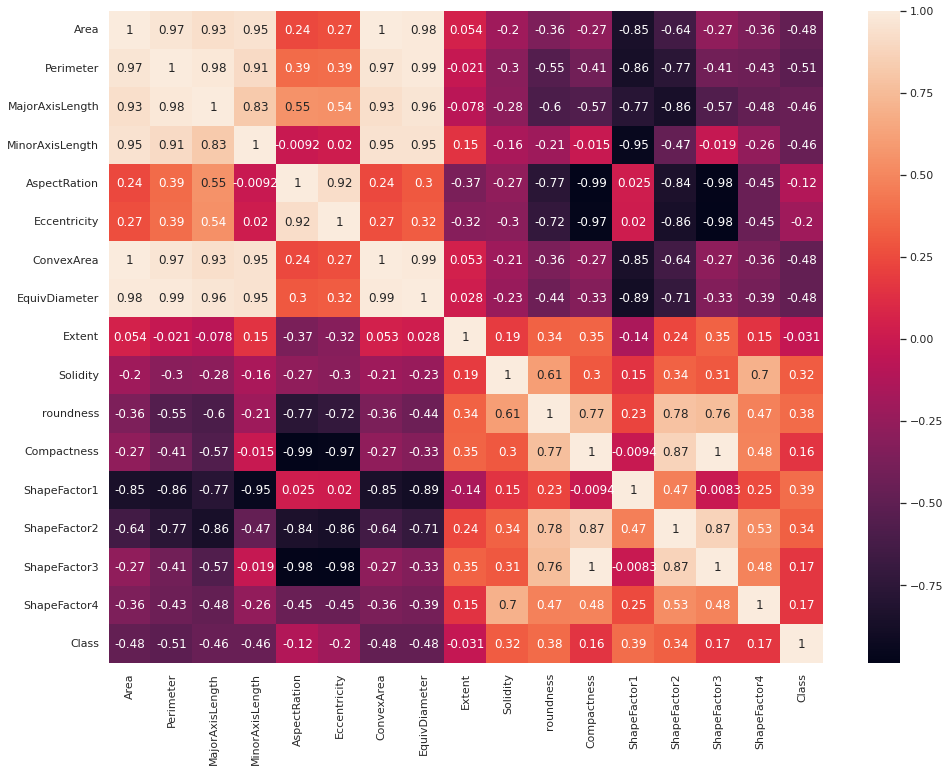

In [ ]:
cor=df.corr()
fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(cor,annot=True)

In [ ]:
columns_X = set(df.columns) - {'Class'}
X = df[columns_X]
X.head()

,Eccentricity,AspectRation,Solidity,Extent,Area,MinorAxisLength,MajorAxisLength,ShapeFactor3,ShapeFactor1,Compactness,EquivDiameter,roundness,ConvexArea,Perimeter,ShapeFactor2,ShapeFactor4
0,0.549812,1.197191,0.988856,0.763923,28395,173.888747,208.178117,0.834222,0.007332,0.913358,190.141097,0.958027,28715,610.291,0.003147,0.998724
1,0.411785,1.097356,0.984986,0.783968,28734,182.734419,200.524796,0.909851,0.006979,0.953861,191.272750,0.887034,29172,638.018,0.003564,0.998430
2,0.562727,1.209713,0.989559,0.778113,29380,175.931143,212.826130,0.825871,0.007244,0.908774,193.410904,0.947849,29690,624.110,0.003048,0.999066
3,0.498616,1.153638,0.976696,0.782681,30008,182.516516,210.557999,0.861794,0.007017,0.928329,195.467062,0.903936,30724,645.884,0.003215,0.994199
4,0.333680,1.060798,0.990893,0.773098,30140,190.279279,201.847882,0.941900,0.006697,0.970516,195.896503,0.984877,30417,620.134,0.003665,0.999166


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Class'], test_size = 0.3, random_state=0)

In [ ]:
print(X_train.count())
print(X_test.count())

Eccentricity       9527
AspectRation       9527
Solidity           9527
Extent             9527
Area               9527
MinorAxisLength    9527
MajorAxisLength    9527
ShapeFactor3       9527
ShapeFactor1       9527
Compactness        9527
EquivDiameter      9527
roundness          9527
ConvexArea         9527
Perimeter          9527
ShapeFactor2       9527
ShapeFactor4       9527
dtype: int64
Eccentricity       4084
AspectRation       4084
Solidity           4084
Extent             4084
Area               4084
MinorAxisLength    4084
MajorAxisLength    4084
ShapeFactor3       4084
ShapeFactor1       4084
Compactness        4084
EquivDiameter      4084
roundness          4084
ConvexArea         4084
Perimeter          4084
ShapeFactor2       4084
ShapeFactor4       4084
dtype: int64


In [ ]:
print(y_train.count())
print(y_test.count())

9527
4084


In [ ]:
import xgboost as xgb
xgbrModel=xgb.XGBClassifier()
# 使用訓練資料訓練模型
xgbrModel.fit(X_train,y_train)
# 使用訓練資料預測
predicted=xgbrModel.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_train, predicted)*100:.2f}%")

Accuracy Score: 94.49%


In [ ]:
print("Score: ",xgbrModel.score(X_train,y_train))
print("Score: ",xgbrModel.score(X_test,y_test))

Score:  0.9448934606906686
Score:  0.9265426052889324


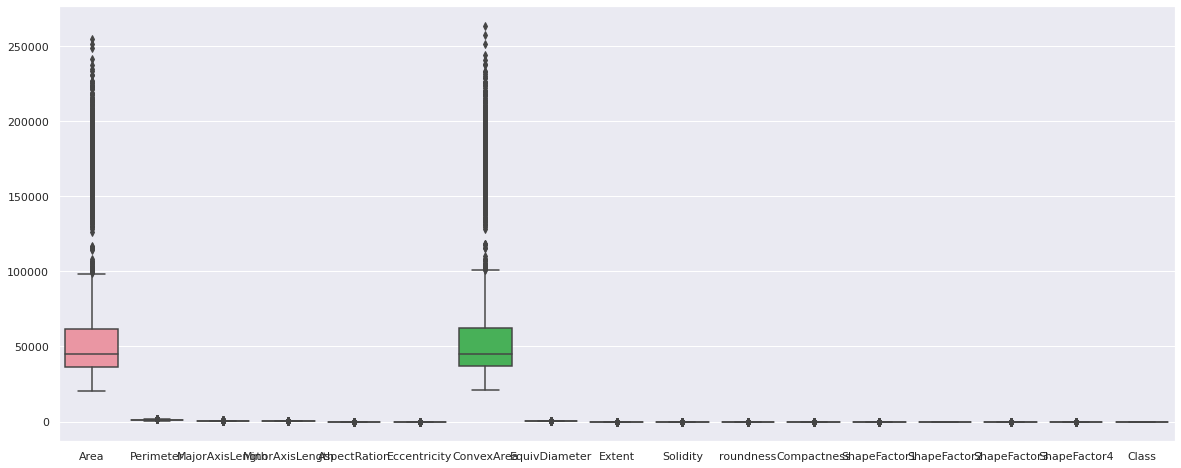

In [ ]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()